# Data Literacy
#### University of Tübingen, Winter 2023/24
## Generative AI in student learning (analysis)

&copy; Jan Goebel, 2024. [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)

In [2]:
# imports for data anaylsis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pingouin as pg
import matplotlib.cm as cm
from scipy.stats import pearsonr
from tueplots import bundles
from tueplots.constants.color import rgb

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janpa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janpa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# load survey data from 23rd of january, 2024
df_full = pd.read_csv('SurveyResults_23_01_2024.csv') # full CSV data with question codes
df_excel = pd.read_excel('Processed_Recoded_dat.xlsx') # modified Excel data with summarised universities and subjects

df_full.head(10)

,id,submitdate,lastpage,startlanguage,seed,startdate,datestamp,CutOff,Gender,Age,...,AIforMaterials,FearOfAI[SQ001],FearOfAI[SQ002],FearOfAI[SQ003],FurtherAI[SQ001],FurtherAI[SQ002],FurtherAI[SQ003],FurtherAI[SQ004],ReaonsAgainstAI,Feedback
0,12,2024-01-16 17:51:17,6.0,de,1433347368,2024-01-16 17:38:05,2024-01-16 17:51:17,Ja (Yes),Männlich (Male),24,...,Ja (Yes),trifft eher zu (Agree),teils teils (Neutral),trifft eher zu (Agree),trifft eher nicht zu,teils teils,trifft voll zu,trifft eher zu,NaN,Ich bin David
1,15,NaN,1.0,de,953373515,2024-01-16 19:27:58,2024-01-16 19:28:02,Ja (Yes),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,2024-01-17 15:25:13,6.0,de,285464047,2024-01-17 15:20:51,2024-01-17 15:25:13,Ja (Yes),Weiblich (Female),23,...,Nein (No),trifft voll zu (Strongly Agree),trifft eher zu (Agree),trifft eher nicht zu (Disagree),trifft eher zu,trifft eher zu,trifft eher nicht zu,trifft eher zu,NaN,NaN
3,18,2024-01-17 15:44:36,6.0,de,613138393,2024-01-17 15:24:20,2024-01-17 15:44:36,Ja (Yes),Männlich (Male),24,...,Unentschlossen (Undecided),trifft eher zu (Agree),trifft voll zu (Strongly Agree),trifft gar nicht zu (Strongly Disagree),trifft eher zu,trifft eher nicht zu,trifft eher zu,trifft gar nicht zu.,NaN,NaN
4,19,2024-01-17 15:28:57,6.0,de,477459883,2024-01-17 15:24:48,2024-01-17 15:28:57,Ja (Yes),Weiblich (Female),28,...,Unentschlossen (Undecided),trifft eher zu (Agree),trifft eher zu (Agree),trifft eher zu (Agree),teils teils,teils teils,teils teils,trifft eher zu,NaN,NaN
5,21,2024-01-17 15:39:50,6.0,de,1106572727,2024-01-17 15:26:49,2024-01-17 15:39:50,Ja (Yes),Weiblich (Female),28,...,Unentschlossen (Undecided),trifft eher zu (Agree),trifft eher zu (Agree),teils teils (Neutral),teils teils,teils teils,teils teils,trifft voll zu,NaN,Wie immer im Leben sind Probleme und Situation...
6,22,2024-01-17 15:52:43,6.0,de,56965718,2024-01-17 15:31:21,2024-01-17 15:52:43,Ja (Yes),Männlich (Male),22,...,Nein (No),teils teils (Neutral),teils teils (Neutral),trifft eher nicht zu (Disagree),trifft eher zu,teils teils,trifft eher nicht zu,trifft eher zu,NaN,Studienmaterialien mit KI zu erstellen ist gar...
7,23,2024-01-17 15:42:04,6.0,de,1545531196,2024-01-17 15:32:35,2024-01-17 15:42:04,Ja (Yes),Weiblich (Female),24,...,Ja (Yes),trifft voll zu (Strongly Agree),trifft eher zu (Agree),trifft eher nicht zu (Disagree),trifft eher zu,trifft eher nicht zu,trifft eher nicht zu,trifft eher zu,Hilft weder in Klausuren noch dabei gut belegt...,NaN
8,24,2024-01-17 15:38:27,6.0,de,751088988,2024-01-17 15:32:37,2024-01-17 15:38:27,Ja (Yes),Weiblich (Female),22,...,Unentschlossen (Undecided),teils teils (Neutral),teils teils (Neutral),trifft eher nicht zu (Disagree),trifft eher zu,teils teils,teils teils,trifft voll zu,NaN,NaN
9,25,2024-01-17 15:37:37,6.0,de,1202289170,2024-01-17 15:35:08,2024-01-17 15:37:37,Ja (Yes),Männlich (Male),24,...,Ja (Yes),trifft eher zu (Agree),trifft voll zu (Strongly Agree),trifft eher zu (Agree),teils teils,trifft eher nicht zu,trifft voll zu,trifft eher zu,NaN,NaN


### In case of font error use the following code

import matplotlib as mpl
import shutil

##### Get the cache directory
cache_dir = mpl.get_cachedir()

##### Remove the entire directory
shutil.rmtree(cache_dir)


In [4]:
df_full[['Subject', 'University', 'AmoutUniAI']].head(5)

,Subject,University,AmoutUniAI
0,Kogni,Tübingen,80
1,NaN,NaN,NaN
2,Medizin,Tübingen,40
3,Theologie,Tübingen,10
4,Biophysics,University of Tübingen,10


In [5]:
df_full.shape

(208, 53)

In [6]:
# sort dfs by column id to replace the in excel modified columns in the csv df
df_full = df_full.sort_values(by='id')
df_excel = df_excel.sort_values(by='id')

# Rename column in df_full
df_full.rename(columns={'ReasonsAgainstAI': 'ReasonsAgainstAI_translated'}, inplace=True)

# Replace modified columns in df_full
df_full['Subject'] = df_excel['Subject']
df_full['University'] = df_excel['University']
df_full['AmoutUniAI'] = df_excel['AmoutUniAI']
df_full['ReasonsAgainstAI_translated'] = df_excel['ReaonsAgainstAI_translated']

# Show modified columns
df_full[['Subject', 'University', 'AmoutUniAI', 'ReasonsAgainstAI_translated']].head(5)

,Subject,University,AmoutUniAI,ReasonsAgainstAI_translated
0,Erziehungswissenschaft,Tuebingen,0.0,NaN
1,International Business Administration,Tuebingen,0.0,NaN
2,Machine Learning,Tuebingen,0.0,NaN
3,Wirtschaftspsychologie,HSHL,1.0,NaN
4,Französisch und evangelische Theologie,université Lumière Lyon 2,1.0,NaN


In [7]:
# Exclude people that stopped the questionnaire immideatly after the 
# the personal information or before or are no students

df_relevant = df_full.drop(df_full[df_full['CutOff'] == 'Nein (No)'].index)
df_relevant = df_relevant.drop(df_relevant[df_relevant['lastpage'] == 1].index)
df_relevant = df_relevant.dropna(subset=['lastpage'])
df_relevant.shape

(198, 54)

### Explore data with simple visualizations in the following

The mean age of our survey participants is 23.54 years
Number of males: 68
Number of females: 120
Number of diverse individuals: 6


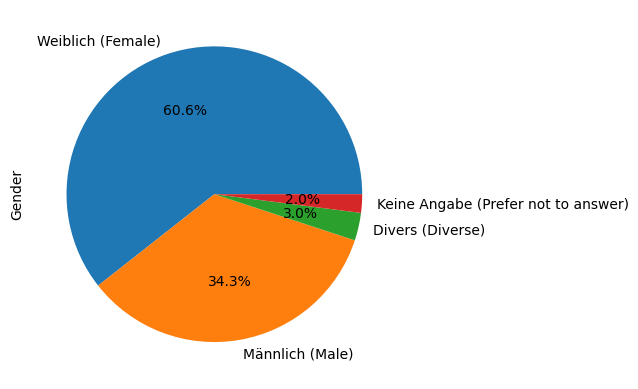

In [8]:
# Pie chart "gender"
df_relevant['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

# Calculate mean age
df_relevant['Age'] = pd.to_numeric(df_relevant['Age'], errors='coerce')
age_mean = df_relevant['Age'].mean()
print("The mean age of our survey participants is " + str(round(age_mean, 2)) + " years")

# Print the number of males, females, and diverse individuals
gender_counts = df_relevant['Gender'].value_counts()
print("Number of males: " + str(gender_counts.get('Männlich (Male)', 0)))
print("Number of females: " + str(gender_counts.get('Weiblich (Female)', 0)))
print("Number of diverse individuals: " + str(gender_counts.get('Divers (Diverse)', 0)))

<Axes: ylabel='Degree'>

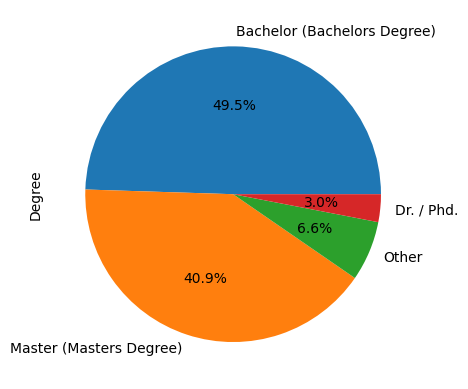

In [9]:
# Pie chart "degree"
df_relevant['Degree'].value_counts().plot.pie(autopct='%1.1f%%')

Wirtschaftspsychologie                                              28
Informatik                                                          15
Kognitionswissenschaft                                              10
Machine Learning                                                     8
Politikwissenschaft                                                  5
                                                                    ..
Kunstgeschichte und Informatik                                       1
Interkulturelle Personalentwicklung und Kommunikationsmanagement     1
Lehramt für Berufskollegs                                            1
Mathematik/Informatik                                                1
BSc. Biochemie                                                       1
Name: Subject, Length: 98, dtype: int64


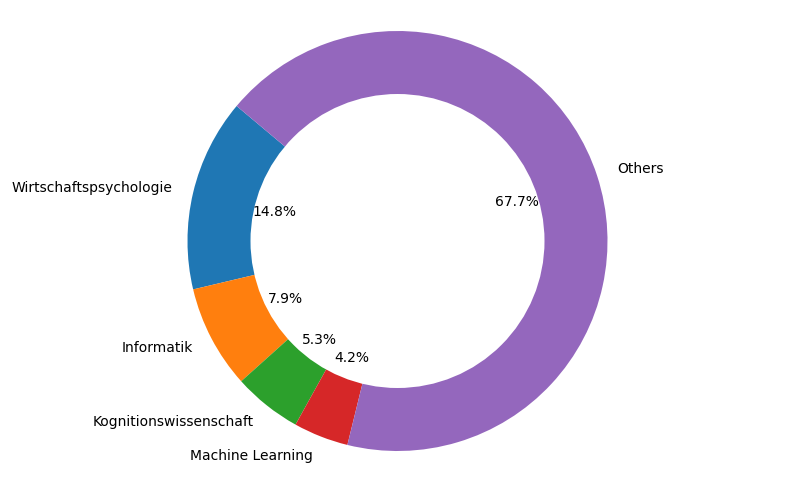

In [10]:
# Create "Subject" pie chart

# List most common subjects
# remove spaces behind subjects
df_relevant['Subject'] = df_relevant['Subject'].str.strip()
subject_counts = df_relevant['Subject'].value_counts()
print(subject_counts)

# Get top 3 subjects
top_subjects = subject_counts.nlargest(4)

# Calculate the sum of all other subjects
other_subjects = subject_counts.sum() - top_subjects.sum()

# Create a new DataFrame for the pie chart
pie_df = top_subjects
pie_df['Others'] = other_subjects

# Pie chart
# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(pie_df, labels = pie_df.index, autopct='%1.1f%%', startangle=140)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

plt.show()

Tuebingen                                      136
HSHL                                            29
Uni Muenster                                     9
FH Muenster                                      6
université Lumière Lyon 2                        1
Goethe-Universitaet Frankfurt                    1
International school of Management               1
Universität zu Koeln & Universita di Trento      1
Friedrich-Schiller-Universität Jena              1
Hochschule Harz                                  1
University of Perugia                            1
Bielefeld                                        1
Muenster                                         1
Name: University, dtype: int64


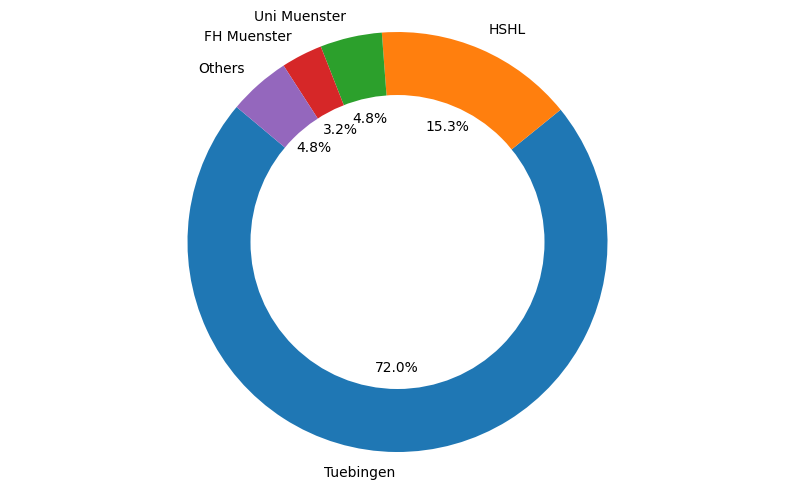

In [11]:
# Create "University" pie chart

# List most common Universities
# remove spaces behind universities
df_relevant['University'] = df_relevant['University'].str.strip()
uni_counts = df_relevant['University'].value_counts()
print(uni_counts)

# Get top 3 subjects
top_unis = uni_counts.nlargest(4)

# Calculate the sum of all other subjects
other_unis = uni_counts.sum() - top_unis.sum()

# Create a new DataFrame for the pie chart
pie_df2 = top_unis
pie_df2['Others'] = other_unis

# Pie chart
# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(pie_df2, labels = pie_df2.index, autopct='%1.1f%%', startangle=140)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

plt.show()

<Axes: ylabel='GenAIUse'>

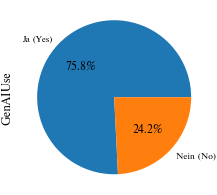

In [12]:
# Pie chart "GenAIuse"

# Set plotting style for ICML 2022
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))

df_relevant['GenAIUse'].value_counts().plot.pie(autopct='%1.1f%%')

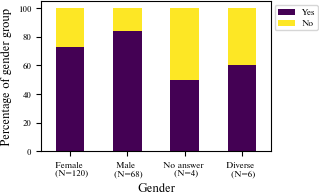

In [104]:
# Check for difference in genAI use for males and females

# Create a crosstab DataFrame
cross_tab = pd.crosstab(df_relevant['Gender'], df_relevant['GenAIUse'], normalize='index')*100

# Create a list of colors
colors = cm.viridis(np.linspace(0, 1, 2))  # Use viridis colormap

# Define custom x labels
custom_labels = ['Diverse \n (N=6)', 'No answer \n (N=4)', 'Male \n (N=68)', 'Female \n (N=120)']

# Define custom legend labels
custom_labels_leg = ['Yes', 'No']

# Plot the DataFrame
ax = cross_tab.plot(kind='bar', stacked=True, color=colors)

#plt.title('Share of generative AI users by gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of gender group')
    
# Set the custom labels
ax.set_xticklabels(custom_labels, rotation=0)

# Create a custom legend
handles, labels = ax.get_legend_handles_labels()
    
legend = ax.legend(handles, custom_labels_leg, loc='upper left', bbox_to_anchor=(1.0, 1.0), ncol=1)

# Reverse the order of the x-axis
ax.invert_xaxis()

# Save the figure
plt.savefig('Share_genAI_gender.pdf')

plt.show()


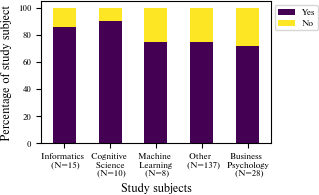

In [105]:
# Get top 4 subjects
top_subjects = df_relevant['Subject'].value_counts().nlargest(4)

# Create a new DataFrame with top 4 subjects and 'Others'
df_relevant['TopSubjects'] = df_relevant['Subject'].where(df_relevant['Subject'].isin(top_subjects.index), 'Others')

# Create a crosstab DataFrame
cross_tab = pd.crosstab(df_relevant['TopSubjects'], df_relevant['GenAIUse'], normalize='index')*100

# Define custom x labels
custom_labels2 = ['Informatics \n (N=15)', 'Cognitive \n Science \n (N=10)', 'Machine \n Learning \n (N=8)', 
                  'Other \n (N=137)', 'Business \n Psychology \n (N=28)']

# Define custom legend labels
custom_labels_leg = ['Yes', 'No']

# Plot the DataFrame
ax = cross_tab.plot(kind='bar', stacked=True, color=colors)

#plt.title('Share of generative AI users by study subject')
plt.xlabel('Study subjects')
plt.ylabel('Percentage of study subject')
    
# Set the custom labels
ax.set_xticklabels(custom_labels2, rotation=0)

# Create a custom legend
handles, labels = ax.get_legend_handles_labels()
    
legend = ax.legend(handles, custom_labels_leg, loc='upper left', bbox_to_anchor=(1.0, 1.0), ncol=1)

# Save the figure
plt.savefig('Share_genAI_studySubject.pdf')

plt.show()

In [13]:
# Create subset of genAI users
df_genAIusers = df_relevant.drop(df_relevant[df_relevant['GenAIUse'] != "Ja (Yes)"].index)
df_genAIusers.shape

(144, 54)

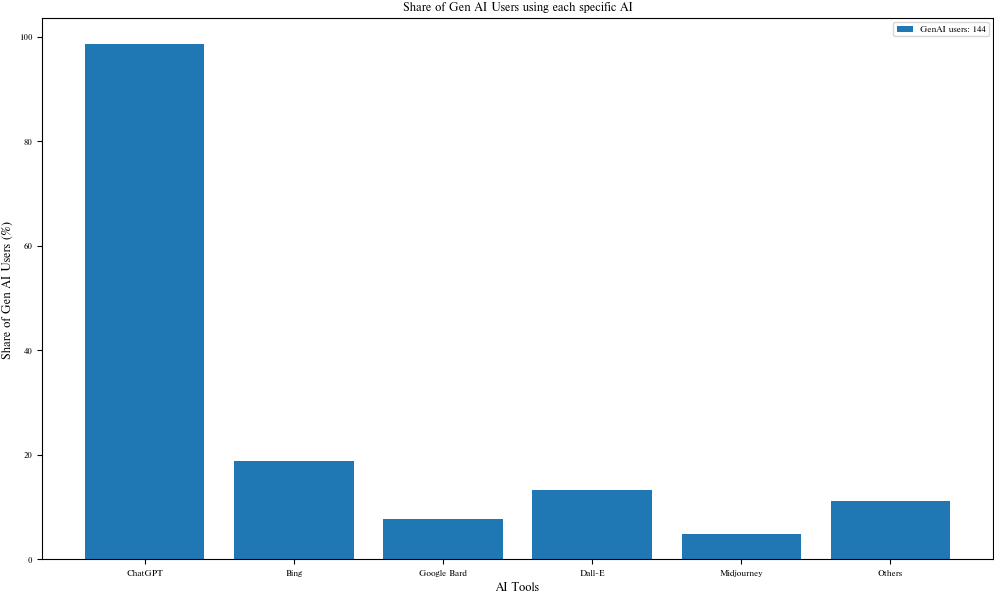

On average of the time the students use gen AI in total 57.07% of the time is used for university purposes


In [14]:
# Getting an overview of what gen AI tools students are using

# List of AI tools
ai_tools = ['TypesOfAI[SQ001]', 'TypesOfAI[SQ002]', 'TypesOfAI[SQ003]', 'TypesOfAI[SQ004]', 'TypesOfAI[SQ005]', 'TypesOfAI[other]']
ai_names = ['ChatGPT', 'Bing', 'Google Bard', 'Dall-E', 'Midjourney', 'Others']

# Replace 'Ja' with 1 and 'Nein' with 0
df_genAIusers[ai_tools] = df_genAIusers[ai_tools].replace({'Ja': 1, 'Nein': 0})

# Replace every non-empty cell in "TypesOfAI[other]" with 1 and every empty cell with 0
df_genAIusers['TypesOfAI[other]'] = df_genAIusers['TypesOfAI[other]'].apply(lambda x: 1 if pd.notnull(x) else 0)

# Calculate the sum for each AI tool
ai_counts = df_genAIusers[ai_tools].sum()

# Calculate the share of Gen AI users that use each specific AI
ai_share = ai_counts / 144 * 100

# Create a bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(ai_tools, ai_share)

plt.title('Share of Gen AI Users using each specific AI')
plt.xlabel('AI Tools')
plt.ylabel('Share of Gen AI Users (%)')

# Replace x-labels with AI tool names
plt.xticks(range(len(ai_tools)), ai_names)

# Add a legend
plt.legend([bars[0]], ['GenAI users: 144'], loc='upper right')

plt.show()

usage_mean = df_genAIusers['AmoutUniAI'].mean()
print("On average of the time the students use gen AI in total " + str(round(usage_mean, 2)) + 
      "% of the time is used for university purposes")

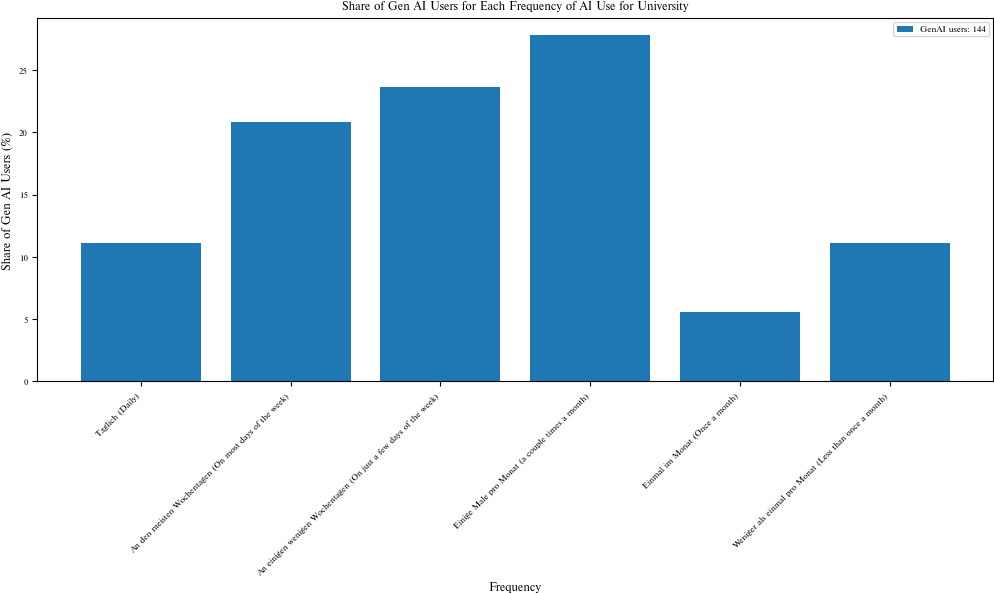

In [15]:
# Reporting frequency of AI use for university

# Define the order of the x-labels
x_labels_order = ["Täglich (Daily)", "An den meisten Wochentagen (On most days of the week)", 
                  "An einigen wenigen Wochentagen (On just a few days of the week)", 
                  "Einige Male pro Monat (a couple times a month)", "Einmal im Monat (Once a month)", 
                  "Weniger als einmal pro Monat (Less than once a month)"]

# Get counts of each frequency
freq_counts = df_relevant['AIFreq'].value_counts().loc[x_labels_order]

# Calculate the share of Gen AI users for each frequency
freq_share = freq_counts / 144 * 100

# Create a bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(freq_counts.index, freq_share)

plt.title('Share of Gen AI Users for Each Frequency of AI Use for University')
plt.xlabel('Frequency')
plt.ylabel('Share of Gen AI Users (%)')

# Rotate x-axis labels and position them directly under the bars
plt.xticks(range(len(x_labels_order)), x_labels_order, rotation=45, ha='right')

# Add a legend
plt.legend([bars[0]], ['GenAI users: 144'], loc='upper right')

plt.show()

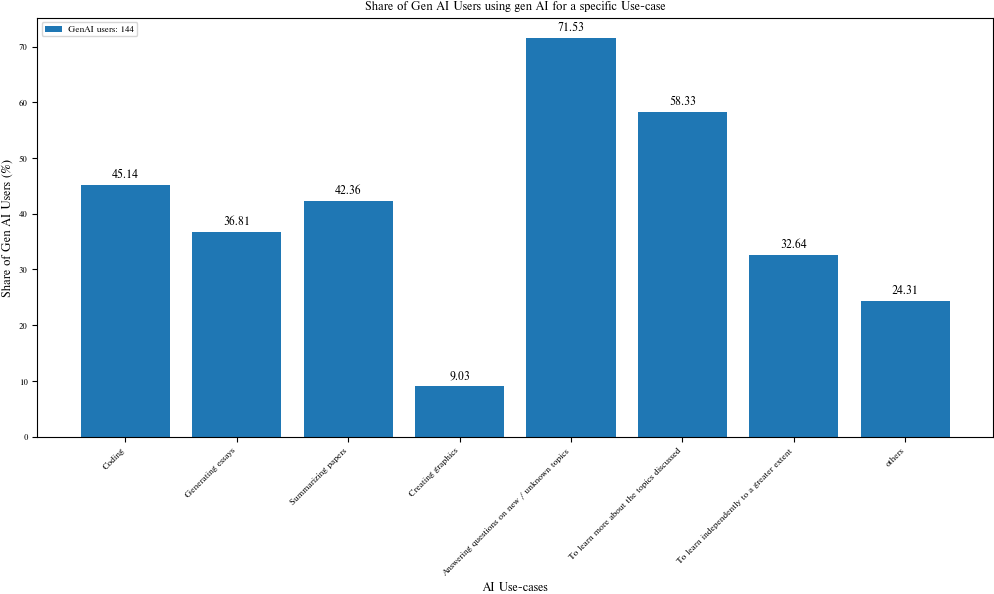

In [16]:
## Getting an overview of what students are using the gen AI tools for

# List of pre-defined use cases
ai_usecases = ['AIUniApplications[SQ001]', 'AIUniApplications[SQ002]', 'AIUniApplications[SQ003]',
               'AIUniApplications[SQ004]', 'AIUniApplications[SQ005]', 'AIUniApplications[SQ006]', 
                'AIUniApplications[SQ007]', 'AIUniApplications[other]']
usecase_names = ['Coding', 'Generating essays', 'Summarizing papers', 'Creating graphics', 
                 'Answering questions on new / unknown topics', 'To learn more about the topics discussed',
                'To learn independently to a greater extent', 'others']

# Replace 'Ja' with 1 and 'Nein' with 0
df_genAIusers[ai_usecases] = df_genAIusers[ai_usecases].replace({'Ja': 1, 'Nein': 0})

# Replace every non-empty cell in "TypesOfAI[other]" with 1 and every empty cell with 0
df_genAIusers['AIUniApplications[other]'] = df_genAIusers['AIUniApplications[other]'].apply(lambda x: 1 if pd.notnull(x) else 0)

# Calculate the sum for each AI tool
ai_counts2 = df_genAIusers[ai_usecases].sum()

# Calculate the share of Gen AI users that use each specific AI
ai_share2 = ai_counts2 / 144 * 100

# Create a bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(ai_usecases, ai_share2)

# Add percentages above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval,2), ha='center', va='bottom')

plt.title('Share of Gen AI Users using gen AI for a specific Use-case')
plt.xlabel('AI Use-cases')
plt.ylabel('Share of Gen AI Users (%)')

# Replace x-labels with AI tool names and rotate
plt.xticks(range(len(ai_usecases)), usecase_names, rotation=45, ha='right')

# Add a legend
plt.legend([bars[0]], ['GenAI users: 144'], loc='upper left')

plt.show()


In [17]:
# Report how much students benefit from AI

# List of AI outcomes
ai_outcomes = ['AIOutcomes[SQ001]', 'AIOutcomes[SQ002]', 'AIOutcomes[SQ003]',
               'AIOutcomes[SQ004]', 'AIOutcomes[SQ005]', 'AIOutcomes[SQ008]', 
               'AIOutcomes[SQ006]', 'AIOutcomes[SQ007]']

# Define the mapping of responses to codes
response_mapping = {
    "trifft voll zu (Strongly Agree)": 2,
    "trifft eher zu (Agree)": 1,
    "teils teils (Neutral)": 0,
    "trifft eher nicht zu (Disagree)": -1,
    "trifft gar nicht zu (Strongly Disagree)": -2
}

# Replace the responses with codes in the AI outcomes columns
df_genAIusers[ai_outcomes] = df_genAIusers[ai_outcomes].replace(response_mapping)

In [18]:
# Calculate and show means of AI outcomes

mean_outcome1 = df_genAIusers['AIOutcomes[SQ001]'].mean()
mean_outcome2 = df_genAIusers['AIOutcomes[SQ002]'].mean()
mean_outcome3 = df_genAIusers['AIOutcomes[SQ003]'].mean()
mean_outcome4 = df_genAIusers['AIOutcomes[SQ004]'].mean()
mean_outcome5 = df_genAIusers['AIOutcomes[SQ005]'].mean()
mean_outcome6 = df_genAIusers['AIOutcomes[SQ006]'].mean()
mean_outcome7 = df_genAIusers['AIOutcomes[SQ007]'].mean()
mean_outcome8 = df_genAIusers['AIOutcomes[SQ008]'].mean()

print("The  mean for outcome one is " + str(round(mean_outcome1, 2)))
print("The  mean for outcome two is " + str(round(mean_outcome2, 2)))
print("The  mean for outcome three is " + str(round(mean_outcome3, 2)))
print("The  mean for outcome four is " + str(round(mean_outcome4, 2)))
print("The  mean for outcome five is " + str(round(mean_outcome5, 2)))
print("The  mean for outcome six is " + str(round(mean_outcome6, 2)))
print("The  mean for outcome seven is " + str(round(mean_outcome7, 2)))
print("The  mean for outcome eight is " + str(round(mean_outcome8, 2)))

The  mean for outcome one is 0.46
The  mean for outcome two is -0.15
The  mean for outcome three is 0.1
The  mean for outcome four is -0.51
The  mean for outcome five is -0.64
The  mean for outcome six is 0.51
The  mean for outcome seven is 1.09
The  mean for outcome eight is 1.43


### Students wishes for future gen AI related processes

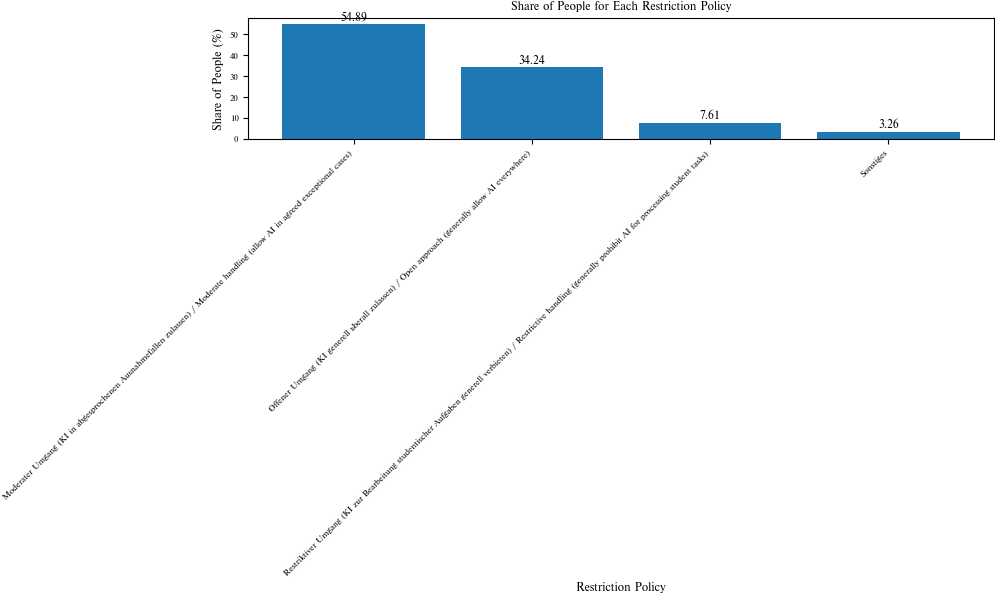

In [19]:
# Bar chart "Restriction Policy gen AI"

# Get counts of each category
policy_counts = df_relevant['RestrictionPolicy'].value_counts()

# Calculate the share of people in each category
policy_share = policy_counts / policy_counts.sum() * 100

# Create a bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(policy_counts.index, policy_share)

# Add percentages above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval,2), ha='center', va='bottom')

plt.title('Share of People for Each Restriction Policy')
plt.xlabel('Restriction Policy')
plt.ylabel('Share of People (%)')

# Rotate x-axis labels and position them directly under the bars
plt.xticks(rotation=45, ha='right')

plt.show()


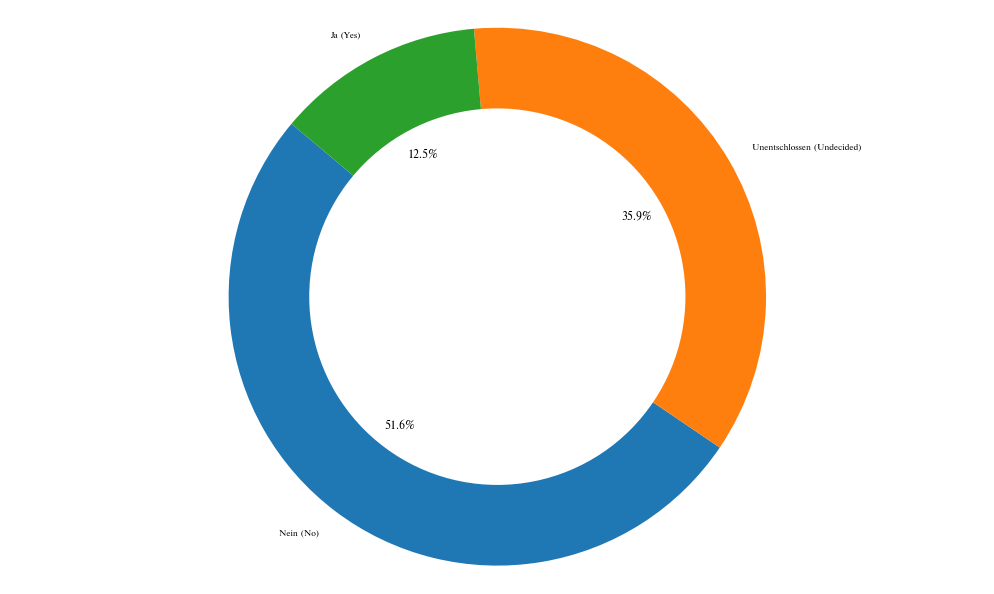

In [20]:
# Pie chart "Assessment with AI"

# Get counts of each category
assess_counts = df_relevant['AIforStudAssess'].value_counts()

# Calculate the share of people in each category
assess_share = assess_counts / assess_counts.sum() * 100

# Pie chart
# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(assess_share, labels = assess_share.index, autopct='%1.1f%%', startangle=140)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

plt.show()

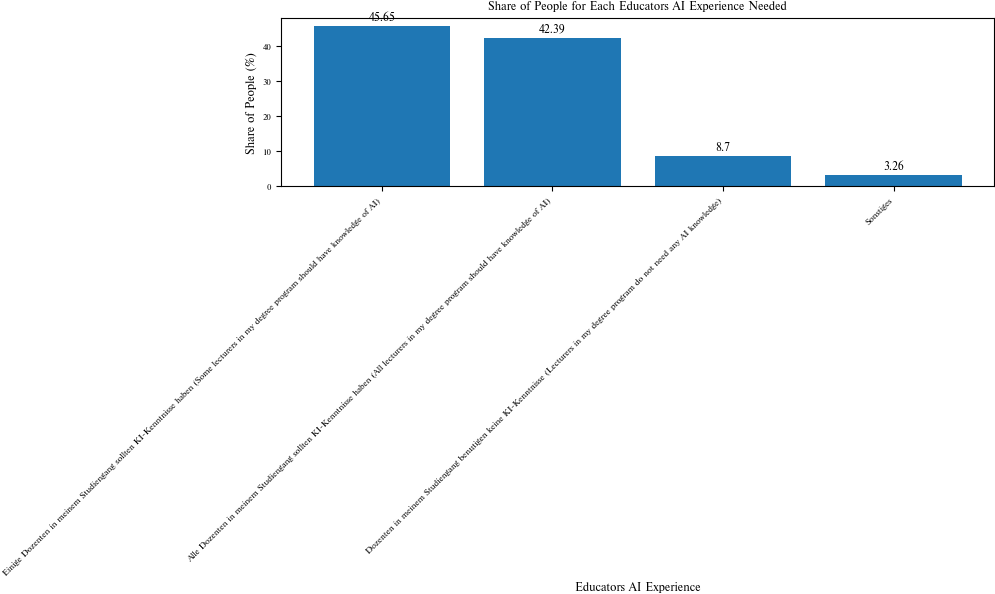

In [21]:
# Bar chart "Educators AI experience needed"

# Get counts of each category
eduExp_counts = df_relevant['EducatorsAIExp'].value_counts()

# Calculate the share of people in each category
eduExp_share = eduExp_counts / eduExp_counts.sum() * 100

# Create a bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(eduExp_counts.index, eduExp_share)

# Add percentages above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval,2), ha='center', va='bottom')

plt.title('Share of People for Each Educators AI Experience Needed')
plt.xlabel('Educators AI Experience')
plt.ylabel('Share of People (%)')

# Rotate x-axis labels and position them directly under the bars
plt.xticks(rotation=45, ha='right')

plt.show()


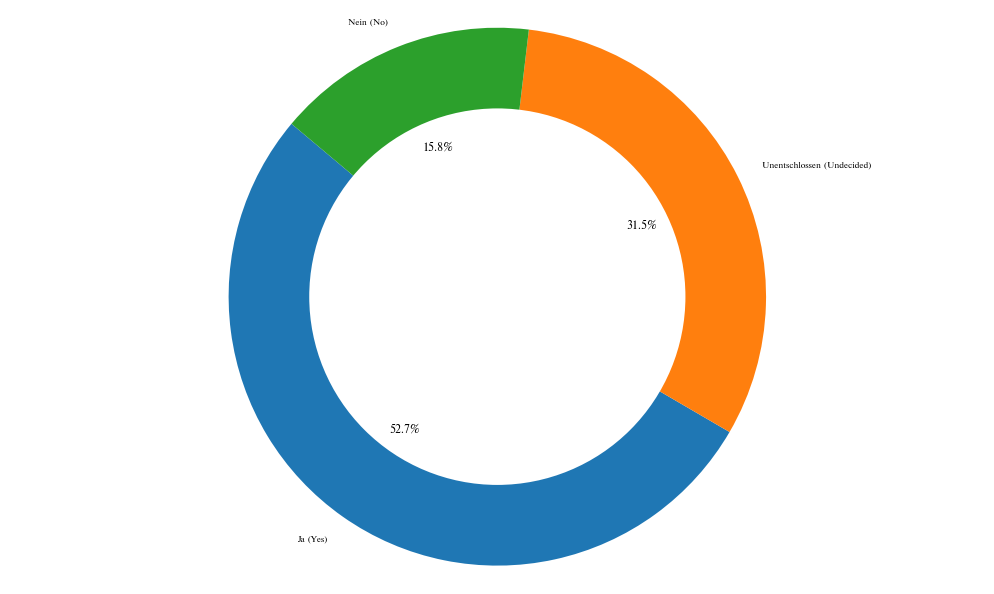

In [22]:
# Pie chart "AI for creating study materials"

# Get counts of each category
AImat_counts = df_relevant['AIforMaterials'].value_counts()

# Calculate the share of people in each category
AImat_share = AImat_counts / AImat_counts.sum() * 100

# Pie chart
# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(AImat_share, labels = AImat_share.index, autopct='%1.1f%%', startangle=140)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

plt.show()

In [23]:
# Create mappings for further likert-scale questions

# List of fear of AI items
ai_fear = ['FearOfAI[SQ001]', 'FearOfAI[SQ002]', 'FearOfAI[SQ003]']

# List of futher AI items
ai_further = ['FurtherAI[SQ001]', 'FurtherAI[SQ002]', 'FurtherAI[SQ003]',
             'FurtherAI[SQ004]']

# Define the mapping of responses to codes
response_mapping2 = {
    "trifft voll zu": 2,
    "trifft eher zu": 1,
    "teils teils": 0,
    "trifft eher nicht zu": -1,
    "trifft gar nicht zu.": -2
}

# Replace the responses with codes in the fear of AI columns
df_relevant[ai_fear] = df_relevant[ai_fear].replace(response_mapping)

# Replace the responses with codes in the further AI item columns
df_relevant[ai_further] = df_relevant[ai_further].replace(response_mapping2)

In [24]:
# Create means for likert-scale items

mean_fearAI1 = df_relevant['FearOfAI[SQ001]'].mean()
mean_fearAI2 = df_relevant['FearOfAI[SQ002]'].mean()
mean_fearAI3 = df_relevant['FearOfAI[SQ003]'].mean()
mean_furtherAI1 = df_relevant['FurtherAI[SQ001]'].mean()
mean_furtherAI2 = df_relevant['FurtherAI[SQ002]'].mean()
mean_furtherAI3 = df_relevant['FurtherAI[SQ003]'].mean()
mean_furtherAI4 = df_relevant['FurtherAI[SQ004]'].mean()

# Show means
print("The  mean for fear of AI item one is " + str(round(mean_fearAI1, 2)))
print("The  mean for fear of AI item two is " + str(round(mean_fearAI2, 2)))
print("The  mean for fear of AI item three is " + str(round(mean_fearAI3, 2)))

print("The  mean for item on peoples AI expertise " + str(round(mean_furtherAI1, 2)))
print("The  mean for item on peoples thinking AI will have an overall positive impact on student learning " 
      + str(round(mean_furtherAI2, 2)))
print("The  mean for item on peoples thinking AI will have an overall negative impact on student learning " 
      + str(round(mean_furtherAI3, 2)))
print("The  mean for item on peoples wishing for opportunities to learn about how gen AI works " 
      + str(round(mean_furtherAI4, 2)))

The  mean for fear of AI item one is 0.76
The  mean for fear of AI item two is 0.89
The  mean for fear of AI item three is -0.28
The  mean for item on peoples AI expertise 0.19
The  mean for item on peoples thinking AI will have an overall positive impact on student learning 0.18
The  mean for item on peoples thinking AI will have an overall negative impact on student learning -0.2
The  mean for item on peoples wishing for opportunities to learn about how gen AI works 0.95


In [25]:
df_relevant[ai_further].head(10)

,FurtherAI[SQ001],FurtherAI[SQ002],FurtherAI[SQ003],FurtherAI[SQ004]
0,-1.0,0.0,2.0,1.0
2,1.0,1.0,-1.0,1.0
3,1.0,-1.0,1.0,-2.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,2.0
6,1.0,0.0,-1.0,1.0
7,1.0,-1.0,-1.0,1.0
8,1.0,0.0,0.0,2.0
9,0.0,-1.0,2.0,1.0
10,0.0,1.0,-1.0,1.0


In [26]:
# validate the fear of AI scale using cronbach's alpha

import pingouin as pg

alpha, ci = pg.cronbach_alpha(data=df_relevant[ai_fear])

print(f"Cronbach's Alpha: {alpha}")
print(f"95% Confidence Interval: {ci}")

Cronbach's Alpha: 0.7117977140264886
95% Confidence Interval: [0.635 0.775]


In [27]:
# Create "Fear of AI scale value" for each person
df_relevant['Fear_of_AI_Scale'] = df_relevant[ai_fear].sum(axis=1)

### Statistical analysis

In [28]:
# Recode gender, focusing on females and males

# Define the mapping of responses to codes
gender_mapping = {
    "Männlich (Male)": 0,
    "Weiblich (Female)": 1
}

# Replace the responses with codes in the gender column
df_relevant['Gender'] = df_relevant['Gender'].replace(gender_mapping)

# Replace all other values with NaN
df_relevant['Gender'] = df_relevant['Gender'].apply(lambda x: x if x in gender_mapping.values() else np.nan)
# Recode GenAIuse

# Define the mapping of responses to codes
genAIuse_mapping = {
    "Ja (Yes)": 1,
    "Nein (No)": 0
}

# Replace the responses with codes in the genAIuse column
df_relevant['GenAIUse'] = df_relevant['GenAIUse'].replace(genAIuse_mapping)

# Create dataframe with relevant items for correlation
df_corrDat = df_relevant[['Gender', 'Age', 'Fear_of_AI_Scale', 'GenAIUse', 'FearOfAI[SQ001]', 
                         'FearOfAI[SQ002]', 'FearOfAI[SQ003]', 'FurtherAI[SQ001]', 'FurtherAI[SQ002]',
                         'FurtherAI[SQ003]', 'FurtherAI[SQ004]']].dropna()

df_corrDat.shape

(172, 11)

In [29]:
# Calculate pearson's correlation coefficient for variables of interest
correlation_matrix = df_corrDat.corr()

print(correlation_matrix)

                    Gender       Age  Fear_of_AI_Scale  GenAIUse  \
Gender            1.000000 -0.088282          0.222572 -0.136859   
Age              -0.088282  1.000000         -0.082668  0.115284   
Fear_of_AI_Scale  0.222572 -0.082668          1.000000 -0.143701   
GenAIUse         -0.136859  0.115284         -0.143701  1.000000   
FearOfAI[SQ001]   0.048352 -0.018072          0.814343 -0.079448   
FearOfAI[SQ002]   0.253843 -0.080432          0.734416 -0.175153   
FearOfAI[SQ003]   0.223925 -0.094487          0.846386 -0.095378   
FurtherAI[SQ001] -0.353244  0.033527         -0.228107  0.144626   
FurtherAI[SQ002] -0.059306  0.098796         -0.271020  0.379819   
FurtherAI[SQ003]  0.027402 -0.043046          0.348892 -0.168153   
FurtherAI[SQ004] -0.045387  0.038576         -0.008149  0.038949   

                  FearOfAI[SQ001]  FearOfAI[SQ002]  FearOfAI[SQ003]  \
Gender                   0.048352         0.253843         0.223925   
Age                     -0.018072        

In [30]:
# Calculate p-values for correlations

# Create an empty DataFrame to hold p-values
p_values = pd.DataFrame(index=df_corrDat.columns, columns=df_corrDat.columns)
# Calculate the p-values
for i in df_corrDat.columns:
    for j in df_corrDat.columns:
        p_values.loc[i, j] = round(pearsonr(df_corrDat[i], df_corrDat[j])[1], 4)

print(p_values)

                  Gender     Age Fear_of_AI_Scale GenAIUse FearOfAI[SQ001]  \
Gender               0.0  0.2495           0.0033   0.0734          0.5288   
Age               0.2495     0.0            0.281   0.1321           0.814   
Fear_of_AI_Scale  0.0033   0.281              0.0     0.06             0.0   
GenAIUse          0.0734  0.1321             0.06      0.0          0.3002   
FearOfAI[SQ001]   0.5288   0.814              0.0   0.3002             0.0   
FearOfAI[SQ002]   0.0008  0.2942              0.0   0.0216             0.0   
FearOfAI[SQ003]   0.0031  0.2176              0.0   0.2133             0.0   
FurtherAI[SQ001]     0.0  0.6624           0.0026   0.0584          0.3082   
FurtherAI[SQ002]  0.4396  0.1973           0.0003      0.0           0.003   
FurtherAI[SQ003]  0.7212   0.575              0.0   0.0275          0.0002   
FurtherAI[SQ004]  0.5544  0.6154           0.9155    0.612          0.2966   

                 FearOfAI[SQ002] FearOfAI[SQ003] FurtherAI[SQ00

C:\Users\janpa\AppData\Roaming\Python\Python310\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


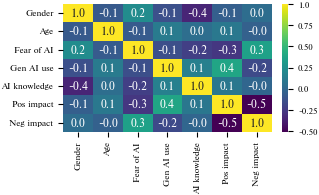

In [31]:
# Create correlation heatmap

# Create correlation df
corrDat = df_corrDat[['Gender', 'Age', 'Fear_of_AI_Scale', 'GenAIUse', 'FurtherAI[SQ001]', 'FurtherAI[SQ002]',
                         'FurtherAI[SQ003]']]

# Calculate correlation matrix
corr = corrDat.corr()

# Define custom labels
x_labels = ["Gender", "Age", "Fear of AI", "Gen AI use", "AI knowledge", "Pos impact", 
            "Neg impact"]
y_labels = ["Gender", "Age", "Fear of AI", "Gen AI use", "AI knowledge", "Pos impact", 
            "Neg impact"]

# Plot the heatmap with custom labels
ax = sns.heatmap(corr, annot=True, fmt=".1f", cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
#plt.title("Correlation Matrix")

# Get the colorbar
cbar = ax.collections[0].colorbar

# Define the tick locations and labels
tick_locs = np.linspace(start=-0.5, stop=1.0, num=7)  # Adjust these values according to your needs
tick_labels = ['-0.50', '-0.25', '0.0', '0.25', '0.50', '0.75', '1.0']

# Set the ticks and labels on the colorbar
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(tick_labels)

# Save the figure
plt.savefig('fig_genAIUseCorrHeatmap.pdf')

plt.show()

In [77]:
# Create logistic regression model

logRegDat = df_corrDat[['Gender', 'GenAIUse', 'FearOfAI[SQ002]', 'Age', 'FurtherAI[SQ002]', 'Fear_of_AI_Scale']]
test = df_relevant[['Fear_of_AI_Scale', 'GenAIUse', 'FurtherAI[SQ001]', 'FurtherAI[SQ002]',
                         'FurtherAI[SQ003]']].dropna()
# Set predictors and outcome variable
X = test[['FurtherAI[SQ002]']]
y = test['GenAIUse']

import statsmodels.api as sm

logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.468816
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               GenAIUse   No. Observations:                  181
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jan 2024   Pseudo R-squ.:                  0.1547
Time:                        18:35:12   Log-Likelihood:                -84.856
converged:                       True   LL-Null:                       -100.39
Covariance Type:            nonrobust   LLR p-value:                 2.500e-08
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.1978      0.198      6.048      0.000       0.810       1.586
FurtherAI[S

In [73]:
# Create logistic regression model

# Set predictors and outcome variable
X = test[['Fear_of_AI_Scale']]
y = test['GenAIUse']

import statsmodels.api as sm

logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.542638
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               GenAIUse   No. Observations:                  181
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jan 2024   Pseudo R-squ.:                 0.02160
Time:                        18:19:20   Log-Likelihood:                -98.217
converged:                       True   LL-Null:                       -100.39
Covariance Type:            nonrobust   LLR p-value:                   0.03728
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.3778      0.222      6.209      0.000       0.943       1.813
Fear_of_AI_

In [74]:
# Create logistic regression model

# Set predictors and outcome variable
X = test[['FurtherAI[SQ001]']]
y = test['GenAIUse']

import statsmodels.api as sm

logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.547455
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               GenAIUse   No. Observations:                  181
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jan 2024   Pseudo R-squ.:                 0.01292
Time:                        18:21:43   Log-Likelihood:                -99.089
converged:                       True   LL-Null:                       -100.39
Covariance Type:            nonrobust   LLR p-value:                    0.1073
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.1077      0.175      6.343      0.000       0.765       1.450
FurtherAI[S

In [75]:
# Set predictors and outcome variable
X = logRegDat[['FurtherAI[SQ002]', 'Age', 'Gender']]
y = logRegDat['GenAIUse']

import statsmodels.api as sm

logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.449813
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               GenAIUse   No. Observations:                  172
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            3
Date:                Sun, 28 Jan 2024   Pseudo R-squ.:                  0.1706
Time:                        18:30:43   Log-Likelihood:                -77.368
converged:                       True   LL-Null:                       -93.284
Covariance Type:            nonrobust   LLR p-value:                 5.677e-07
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3937      1.441      0.273      0.785      -2.430       3.217
FurtherAI[S

In [78]:
# Set predictors and outcome variable
X = logRegDat[['Fear_of_AI_Scale', 'Age', 'Gender']]
y = logRegDat['GenAIUse']

import statsmodels.api as sm

logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.520140
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               GenAIUse   No. Observations:                  172
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            3
Date:                Sun, 28 Jan 2024   Pseudo R-squ.:                 0.04095
Time:                        18:35:16   Log-Likelihood:                -89.464
converged:                       True   LL-Null:                       -93.284
Covariance Type:            nonrobust   LLR p-value:                   0.05407
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1493      1.341      0.111      0.911      -2.480       2.778
Fear_of_AI_

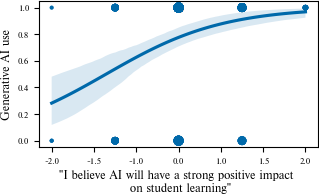

In [85]:
# define the predictor variable and the response variable
x = df_corrDat['FurtherAI[SQ002]']
y = df_corrDat['GenAIUse']

# Calculate relative frequencies
relative_frequencies = df_corrDat['FurtherAI[SQ002]'].value_counts(normalize=True)

# Map relative frequencies to data
sizes = df_corrDat['FurtherAI[SQ002]'].map(relative_frequencies)

# Plot logistic regression curve with varying point sizes
ax = sns.regplot(x=x, y=y, data=df_corrDat, logistic=True, ci=95, color=rgb.tue_blue, scatter_kws={'s': sizes * 100})

# Set title
#ax.set_title('The effect of positive attitudes towards AI on \n student’s use of generative AI')

# Set x and y labels
ax.set_xlabel("\"I believe AI will have a strong positive impact \n on student learning\"")
ax.set_ylabel("Generative AI use")

# Set custom x labels
ax.set_xticks(np.linspace(min(x), max(x), 7))
ax.set_xticklabels(['-2.0', '-1.5', '-1.0', '0.0', '1.0', '1.5', '2.0'])

# Save the figure
plt.savefig('logit_Reg_PosAtt_GenAI.pdf')

In [48]:
df_corrDat['Fear_of_AI_Scale'].head(10)

0     2.0
2     2.0
3     1.0
4     3.0
5     2.0
6    -1.0
7     2.0
8    -1.0
9     4.0
10    0.0
Name: Fear_of_AI_Scale, dtype: float64

### Qualitative analysis of reasons for people not using gen AI

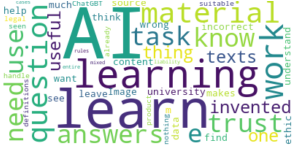

In [108]:
# Total of N=46 (57%) responses

# Feedback translated into english using the deepl translator
# Selecting the relevant column
text = df_relevant['ReasonsAgainstAI_translated'].dropna()

# Convert column values to a single string
text = " ".join(map(str, text))

# Preprocess text using nltk
# Tokenize text into words using the default word tokenizer
words = nltk.word_tokenize(text)
# Remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
# Add the word "n't" to the list
stopwords.append("n't")
stopwords.append("e")
words = [word for word in words if word not in stopwords]
# Join words back into a single string
text = " ".join(words)

# Create word cloud object and generate word cloud
wc = WordCloud(max_words=50, background_color="white", colormap="viridis")
wc.generate(text)

# Plot word cloud using matplotlib
plt.figure(figsize=(3, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# Add a title to the plot
#plt.title("Your Title")

# Save the figure
plt.savefig('wordcloud_ReasonsAgainstAI.pdf')

plt.show()

In [107]:
# Import collections
import collections
# Create a Counter object from the list of words
counter = collections.Counter(words)
# Get the 100 most common words and their counts
most_common = counter.most_common(100)
# Print the result
print(most_common)

[('I', 41), ('.', 37), (',', 26), ('AI', 14), ('like', 7), ('learn', 7), ('would', 7), ('learning', 6), ('It', 5), ('material', 4), ('questions', 3), ('know', 3), ('use', 3), ('trust', 3), ('answers', 3), ('(', 3), (')', 3), ('task', 3), ('also', 3), ('need', 3), ('Because', 3), ('work', 2), ('invented', 2), ('The', 2), ('texts', 2), ('useful', 2), ('one', 2), ('university', 2), ('find', 2), ('leave', 2), ('i.e', 2), ('think', 2), ('want', 2), ('see', 2), ('incorrect', 2), ('wrong', 2), ("'m", 2), ('makes', 2), ('much', 2), ('understand', 2), ('content', 2), ('data', 2), ('ChatGBT', 1), ('suitable', 1), ('legal', 1), ('handle', 1), ('definitions', 1), ('nothing', 1), ('already', 1), ('seen', 1), ('product', 1), ('liability', 1), ('rules', 1), ('mixed', 1), ('entire', 1), ('cases/judgements', 1), ('function', 1), ('summarise', 1), ('chargeable', 1), ('otherwise', 1), ('thing', 1), ('could', 1), ('Maybe', 1), ('day', 1), ('sources', 1), ('longer', 1), ('Besides', 1), ('forbids', 1), ('Et